In [3110]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import csv
import random

from itertools import permutations
from itertools import combinations, product


fast_food = pd.read_csv('./AllFastFood.csv')

# import tabula

# pdf_file ='./CAVA_1223_REC_GID_NUTR_ALL_REG.pdf'

# tabula.convert_into(pdf_file, 'FFN_Cava.csv', output_format='csv', pages='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         758 non-null    object 
 1   Item            758 non-null    object 
 2   Calories        758 non-null    int64  
 3   TotalFat_g      758 non-null    float64
 4   SaturatedFat_g  758 non-null    float64
 5   Cholesterol_mg  758 non-null    int64  
 6   Sodium_mg       758 non-null    int64  
 7   Carbs_g         758 non-null    int64  
 8   Fiber_g         758 non-null    int64  
 9   Sugars_g        758 non-null    int64  
 10  Protein_g       758 non-null    int64  
 11  ItemType        758 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 71.2+ KB


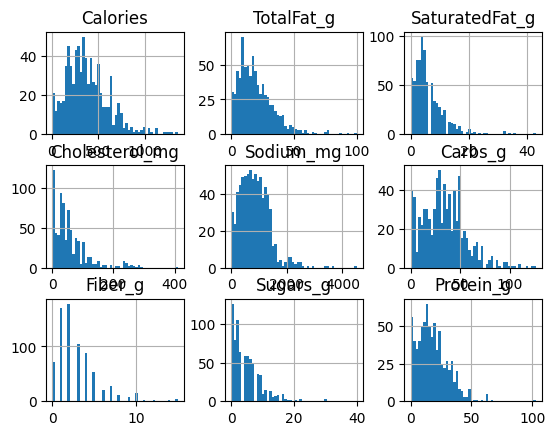

In [3111]:
#data profile
#fast food info

fast_food.info()

numerical = fast_food.select_dtypes(include =['object','int64', 'float64']).columns.tolist()

#data clean
#fast_food.fillna('LD', inplace=True) # fill missing values with 'LD'
# fast_food.isna().sum() # shows all null rows think about what to drop, what will you use, and what can you sacrifice

fast_food.head()

# Histogram for numerical data
fast_food[numerical].hist(bins=50)
plt.show()


In [ ]:

# Function to read meals from CSV
def read_meals_from_csv(csv_filename):
    meals = []
    with open(csv_filename, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            meal_data = {
                'name': f"{row['Company']} - {row['Item']}",  # Assuming 'Company' and 'Item' are column headers
                'calories': float(row['Calories']),
                'total_fat': float(row['TotalFat_g']),
                'saturated_fat': float(row['SaturatedFat_g']),
                'cholesterol': float(row['Cholesterol_mg']),
                'sodium': float(row['Sodium_mg']),
                'carbs': float(row['Carbs_g']),
                'fiber': float(row['Fiber_g']),
                'sugars': float(row['Sugars_g']),
                'protein': float(row['Protein_g'])
            }
            meals.append(meal_data)
    return meals

# Function to generate all meal combinations of length 
def find_all_meal_combinations(meals):
    all_combinations_with_sums = []
    for combination in combinations(meals, 1): 
        sum_of_columns = {key: sum(meal[key] for meal in combination) for key in combination[0] if key != 'name'}
        if sum_of_columns['calories'] <= 2000 and sum_of_columns['total_fat'] <= 65 and sum_of_columns['protein'] <= 85 and sum_of_columns['carbs'] <= 250 and sum_of_columns['sodium'] <= 1500 and sum_of_columns['fiber'] <= 28:
            combination_with_sum = (combination, sum_of_columns)
        all_combinations_with_sums.append(combination_with_sum)
    return all_combinations_with_sums

# Replace 'meals.csv' with your CSV filename
meals_data = read_meals_from_csv('./FFN_Chic.csv') # switch csv file to see if it can fulfill the requirements

# Finding all possible meal combinations of length with column sums
found_combinations = find_all_meal_combinations(meals_data)

# Displaying all possible combinations with column sums
for combination, sum_of_columns in found_combinations:
    print("Combinations:")
    for meal in combination:
        print(meal['name'])  # Print the meal name in the combination
    print("Sum of Columns:")
    print(sum_of_columns)
    print("-" * 20)  # Separator between combinations


In [3057]:
# Function to read meals from CSV
def read_meals_from_csv(csv_filename):
    meals = []
    with open(csv_filename, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            meal_data = {
                'name': f"{row['Company']} - {row['Item']}",  # Assuming 'Company' and 'Item' are column headers
                'calories': float(row['Calories']),
                'total_fat': float(row['TotalFat_g']),
                'saturated_fat': float(row['SaturatedFat_g']),
                'cholesterol': float(row['Cholesterol_mg']),
                'sodium': float(row['Sodium_mg']),
                'carbs': float(row['Carbs_g']),
                'fiber': float(row['Fiber_g']),
                'sugars': float(row['Sugars_g']),
                'protein': float(row['Protein_g']),
                'item_type': row['ItemType']
            }
            meals.append(meal_data)
    return meals

# Function to filter combinations for length 3 with 'Pro', 'Carb', 'Top' item types
def includes_pro_carb_top_3(combination):
    item_types = {meal['item_type'] for meal in combination}
    return 'Pro' in item_types and 'Carb' in item_types and 'Top' in item_types

# Function to filter combinations of length 4 with 'Pro', 'Carb', 'Top', 'Side' item types
def includes_pro_carb_top_side(combination):
    item_types = {meal['item_type'] for meal in combination}
    top_count = sum(1 for meal in combination if meal['item_type'] == 'Top')
    return 'Pro' in item_types and 'Carb' in item_types and 'Side' in item_types and 'Top' in item_types and top_count >= 1

# Modify the function for combinations of length 4 with two 'Top' item types
def includes_pro_carb_2tops(combination):
    item_types = {meal['item_type'] for meal in combination}
    top_count = sum(1 for meal in combination if meal['item_type'] == 'Top')
    return 'Pro' in item_types and 'Carb' in item_types and 'Top' in item_types and top_count == 2

def find_all_meal_combinations(meals, length):
    all_combinations_with_sums = []
    
    # Loop for combinations of the specified length
    for combination in combinations(meals, length):
        sum_of_columns = {key: sum(meal[key] for meal in combination) for key in combination[0] if key != 'name' if key != 'item_type'}
        if length == 3 and includes_pro_carb_top_3(combination) and all(sum_of_columns[key] <= limit for key, limit in {'calories': 2000, 'total_fat': 65, 'protein': 85, 'carbs': 250, 'sodium': 1500, 'fiber': 28}.items()):
            all_combinations_with_sums.append((combination, sum_of_columns))
        elif length == 4 and includes_pro_carb_top_side(combination) and all(sum_of_columns[key] <= limit for key, limit in {'calories': 2000, 'total_fat': 65, 'protein': 85, 'carbs': 250, 'sodium': 1500, 'fiber': 28}.items()):
            all_combinations_with_sums.append((combination, sum_of_columns))
        elif length == 4 and includes_pro_carb_2tops(combination) and all(sum_of_columns[key] <= limit for key, limit in {'calories': 2000, 'total_fat': 65, 'protein': 85, 'carbs': 250, 'sodium': 1500, 'fiber': 28}.items()):
            all_combinations_with_sums.append((combination, sum_of_columns))

    return all_combinations_with_sums

unique_combos = {}

# read csv
meals_data14 = read_meals_from_csv('./chipotle_usa_nutritions.csv')

# Finding combinations of length 3
found_combinations_3 = find_all_meal_combinations(meals_data14, 3)

# Finding combinations of length 4
found_combinations_4 = find_all_meal_combinations(meals_data14, 4)

for combination, sum_of_columns in found_combinations_3:
    combination_identifier = tuple(sorted(f"{meal['name']}_{meal['item_type']}" for meal in combination))
    if combination_identifier not in unique_combos:
        unique_combos[combination_identifier] = (combination, sum_of_columns)

for combination, sum_of_columns in found_combinations_4:
    combination_identifier = tuple(sorted(f"{meal['name']}_{meal['item_type']}" for meal in combination))
    if combination_identifier not in unique_combos:
        unique_combos[combination_identifier] = (combination, sum_of_columns)

sorted_unique_combinations = sorted(unique_combos.items(), key=lambda x: x[1][1]['calories'])

# Printing combinations with their respective criteria
for _, (combination, sum_of_columns) in sorted_unique_combinations:
    print("Combinations:")
    for meal in combination:
        meal_name, item_type = meal['name'], meal['item_type']
        print(f"{meal_name} - {item_type}")  
    print("Sum of Columns:")
    print(sum_of_columns)
    print("-" * 20)

# 2283

Combinations:
Chipotle - Crispy Corn Tortilla taco - Carb
Chipotle - Steak - Pro
Chipotle - Romaine Lettuce - Top
Sum of Columns:
{'calories': 355.0, 'total_fat': 15.0, 'saturated_fat': 3.5, 'cholesterol': 80.0, 'sodium': 330.0, 'carbs': 31.0, 'fiber': 5.0, 'sugars': 0.0, 'protein': 24.0}
--------------------
Combinations:
Chipotle - Crispy Corn Tortilla taco - Carb
Chipotle - Sofritas - Pro
Chipotle - Romaine Lettuce - Top
Sum of Columns:
{'calories': 355.0, 'total_fat': 19.0, 'saturated_fat': 2.5, 'cholesterol': 0.0, 'sodium': 560.0, 'carbs': 39.0, 'fiber': 7.0, 'sugars': 5.0, 'protein': 11.0}
--------------------
Combinations:
Chipotle - Crispy Corn Tortilla taco - Carb
Chipotle - Steak - Pro
Chipotle - Tomatillo-Green Chili Salsa - Top
Sum of Columns:
{'calories': 365.0, 'total_fat': 15.0, 'saturated_fat': 3.5, 'cholesterol': 80.0, 'sodium': 590.0, 'carbs': 34.0, 'fiber': 4.0, 'sugars': 2.0, 'protein': 24.0}
--------------------
Combinations:
Chipotle - Crispy Corn Tortilla taco - 

In [ ]:
count_of_combinations = len(sorted_unique_combinations)

for index, (combination, sum_of_columns) in enumerate(sorted_unique_combinations, start=1):
    print(f"Combination {index}:")
    print(combination)  # Print the contents of combination to inspect its structure
    print("Sum of Columns:")
    print(sum_of_columns)
    print("-" * 20)  # Separator between combinations

# Display the count of unique combinations
print(f"Total unique combinations: {count_of_combinations}")

In [3109]:

import random

# Your existing code for generating sorted unique combinations

# Define your daily intake limits for carbs and protein only
daily_limits = {
    'calories': (0, 2000),  # Fixed caloric intake
    'total_fat': (0, 82),  # Fixed total fat intake
    'sodium': (0, 2300),  # Fixed cholesterol intake
    'carbs': (0, 344),  # Carb intake range
    'fiber': (0, 30),  # Fixed fiber intake
    'protein': (0, 90)  # Protein intake range
}

# Select meals randomly that meet nutritional requirements and total intake range
total_meals = 3  # Set the number of meals per day
meals_selected = []
total_consumed = {key: 0 for key in daily_limits}
selected_combinations = []

# Shuffle the sorted unique combinations
random.shuffle(sorted_unique_combinations)

for _, (combination, sum_of_columns) in sorted_unique_combinations:
    exceeds_limit = False

    # Check if the sum of nutrients falls within the specified ranges
    sum_within_range = (
        all(
            daily_limits[nutrient] >= total_consumed[nutrient] + sum_of_columns[nutrient]
            if isinstance(daily_limits[nutrient], int)
            else daily_limits[nutrient][0] <= total_consumed[nutrient] + sum_of_columns[nutrient] <= daily_limits[nutrient][1]
            for nutrient in daily_limits
        )
        and len(meals_selected) < total_meals
    )

    if sum_within_range:
        meals_selected.append(combination)
        selected_combinations.append((combination, sum_of_columns))

        for nutrient, value in sum_of_columns.items():
            if nutrient in daily_limits:
                total_consumed[nutrient] += value

        if len(meals_selected) == total_meals:
            break

# Print the randomly selected combinations and their total nutritional values
for combination, sum_of_columns in selected_combinations:
    print("Randomly Selected Combination:")
    for meal in combination:
        meal_name, item_type = meal['name'], meal['item_type']
        print(f"{meal_name} - {item_type}")
    print("Total Nutritional Values for this Combination:")
    print(sum_of_columns)
    print("-" * 20)  # Separator between selected combinations





Randomly Selected Combination:
Chipotle - Crispy Corn Tortilla taco - Carb
Chipotle - Carnitas - Pro
Chipotle - Roasted Chili-Corn Salsa - Top
Chipotle - Queso Blanco (Side) - Top
Total Nutritional Values for this Combination:
{'calories': 730.0, 'total_fat': 40.5, 'saturated_fat': 14.0, 'cholesterol': 125.0, 'sodium': 1270.0, 'carbs': 52.0, 'fiber': 6.0, 'sugars': 6.0, 'protein': 39.0}
--------------------
Randomly Selected Combination:
Chipotle - Cilantro-Lime Brown Rice - Carb
Chipotle - Carnitas - Pro
Chipotle - Romaine Lettuce - Top
Total Nutritional Values for this Combination:
{'calories': 425.0, 'total_fat': 18.0, 'saturated_fat': 8.0, 'cholesterol': 65.0, 'sodium': 640.0, 'carbs': 37.0, 'fiber': 3.0, 'sugars': 0.0, 'protein': 27.0}
--------------------
Randomly Selected Combination:
Chipotle - Crispy Corn Tortilla taco - Carb
Chipotle - Steak - Pro
Chipotle - Romaine Lettuce - Top
Total Nutritional Values for this Combination:
{'calories': 355.0, 'total_fat': 15.0, 'saturated_